<a href="https://colab.research.google.com/github/Sashka1101/TFG_Gender_Bias/blob/main/CasoMujeresPreProcesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

In [ ]:
pip install nltk

In [ ]:
pip install gensim

In [ ]:
pip install wordcloud

In [ ]:
pip install matplot

In [ ]:
pip install --upgrade google-api-python-client

In [ ]:
pip install --upgrade pip

In [ ]:
pip install deep-translator

In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from deep_translator import LingueeTranslator
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import googletrans
from googletrans import Translator
import csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('doctoró', 0.4718236029148102), ('sevilla', 0.4384324252605438), ('geológicas', 0.4254118502140045), ('licenció', 0.42236772179603577), ('especialista', 0.41356852650642395), ('extraordinario', 0.4130227267742157), ('título', 0.3898697793483734), ('titular', 0.3879641890525818), ('electrónica', 0.38704946637153625), ('telecomunicación', 0.3856601119041443)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


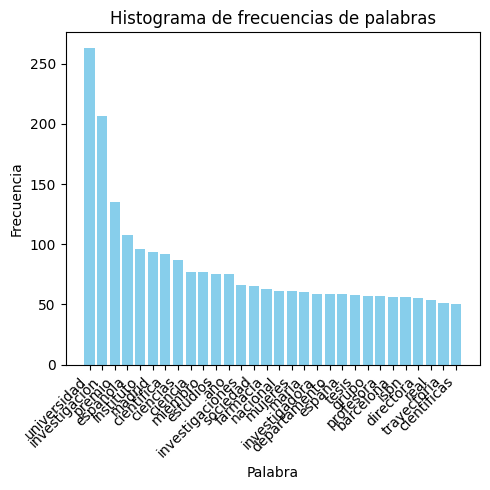

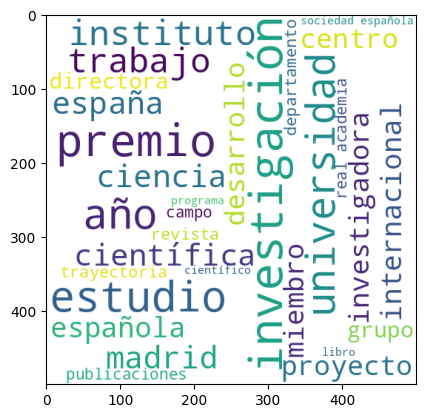

In [25]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')


df = pd.read_csv('/DatosTFG_columnas_hombre_mujer.csv')

#Creo que para lemmatization necesito pasar a inglés. Revisar eso.


#Pre-Procesado: poner en minuscula, quitar stop words (tanto español como inglés), crear mi propio vocabulario. Pre-entreno.

#Ni idea, la verdad
def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    return text

#Poner en minúsula
def change_lower(text):
    text = text.lower()
    return text

#stopwords español
stopwords_list = stopwords.words("spanish")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

#stopwords inglés.
stopwords_list2 = stopwords.words("english")
def remover2(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list2]
    text = ' '.join(final_list)
    return text


def get_w2vdf(df):
    w2v_df = pd.DataFrame(df['Biografía']).values.tolist()
    for i in range(len(w2v_df)):
        w2v_df[i] = w2v_df[i][0].split(" ")
    return w2v_df

#Se crea el vocabulario (palabras más similares, o sumer y restar vectores...)
def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=4,
                         window=4,
                         alpha=0.03,
                         min_alpha=0.0007,
                         sg = 1,
                         workers=cores-1)

    w2v_model.build_vocab(w2v_df, progress_per=10000)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model


#Aplico a la biografía todas las cosas de pre-procesado.
before = type(df.Biografía[0])
#print(before)
df[['Biografía']] = df[['Biografía']].astype(str)
df['Biografía'] = df['Biografía'].apply(change_lower)
df['Biografía'] = df['Biografía'].apply(clean_data)
df['Biografía'] = df['Biografía'].apply(remover)
df['Biografía'] = df['Biografía'].apply(remover2)

#lo junto todo el un solo string.
text = ' '.join(df['Biografía'])

#lo entreno para tener mi propio vocabulario.
w2v_df = get_w2vdf(df)
w2v_model = train_w2v(w2v_df)

#prueba a ver qué pasa.
print(w2v_model.wv.most_similar(positive=["universidad"]))



#Aquí entiendo que debo pasar a inglés porque no hace nada
# Descargar recursos necesarios para NLTK (solo es necesario la primera vez)
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    # Tokenizar el texto en palabras
    tokens = word_tokenize(text)

    # Inicializar lemmatizador de palabras
    lemmatizer = WordNetLemmatizer()

    # Lematizar cada palabra y agregarla a una lista
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Unir las palabras lematizadas en un string nuevamente
    lemmatized_text = ' '.join(lemmatized_tokens)

    return lemmatized_text

# Ejemplo de uso
texto_lemmatizado = lemmatize_text(text)
#print(texto_lemmatizado)

def eliminar_palabras_con_mismo_lema(text):
    lemmatized_text = lemmatize_text(text)

    # Convertir el texto lematizado en una lista de palabras
    palabras = lemmatized_text.split()

    # Eliminar palabras duplicadas
    palabras_sin_duplicados = list(set(palabras))

    # Unir las palabras sin duplicados en un string nuevamente
    texto_sin_duplicados = ' '.join(palabras_sin_duplicados)

    return texto_sin_duplicados

texto_sin_duplicados = eliminar_palabras_con_mismo_lema(text)
#print(texto_sin_duplicados)

df['Biografía'] = df['Biografía'].apply(lemmatize_text)
df['Biografía'] = df['Biografía'].apply(eliminar_palabras_con_mismo_lema)





def contar_frecuencia(text):
    # Dividir el texto en palabras
    palabras = text.split()

    # Crear un diccionario para almacenar la frecuencia de cada palabra
    frecuencia = {}

    # Iterar sobre cada palabra en el texto
    for palabra in palabras:
        # Si la palabra ya está en el diccionario, aumentar su frecuencia en 1
        if palabra in frecuencia:
            frecuencia[palabra] += 1
        # Si la palabra no está en el diccionario, inicializar su frecuencia en 1
        else:
            frecuencia[palabra] = 1

    return frecuencia


def ordenar_por_frecuencia(text):
    # Obtener la frecuencia de cada palabra
    frecuencia_palabras = contar_frecuencia(text)

    # Ordenar las palabras por frecuencia (de mayor a menor)
    palabras_ordenadas = sorted(frecuencia_palabras, key=lambda palabra: frecuencia_palabras[palabra], reverse=True)

    return palabras_ordenadas

# Ejemplo de uso
frecuencia_palabras = contar_frecuencia(text)
palabras_ordenadas = ordenar_por_frecuencia(text)
#print(palabras_ordenadas)
#print(frecuencia_palabras)


def dibujar_histograma(text):
    # Obtener la frecuencia de cada palabra
    frecuencia_palabras = contar_frecuencia(text)

    # Ordenar las palabras por frecuencia (de mayor a menor)
    palabras_ordenadas = sorted(frecuencia_palabras, key=lambda palabra: frecuencia_palabras[palabra], reverse=True)

    # Tomar solo las primeras 30 palabras
    palabras_30 = palabras_ordenadas[:30]

    # Obtener las frecuencias y las palabras para el gráfico
    frecuencias = [frecuencia_palabras[palabra] for palabra in palabras_30]
    palabras = palabras_30

    # Crear el gráfico de barras
    plt.figure(figsize=(5, 5))
    plt.bar(palabras, frecuencias, color='skyblue')

    # Añadir etiquetas y título
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de frecuencias de palabras')

    # Rotar las etiquetas del eje x para que sean legibles
    plt.xticks(rotation=45, ha='right')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

dibujar_histograma(text)


wc = WordCloud(
    max_words = 30,
    stopwords = stopwords_list,
    width = 500,
    height = 500,
    margin = 0,
    background_color = 'white'
).generate(text)

plt.imshow(wc)
